# Matrix Profile Example
## 2018 NYC Yellow Taxi Passengers

In this example, we use the STOMP algorithm to perform both data mining and exploratory analysis tasks. STOMP is an exact algorithm; meaning that it will not give an approximate solution. The data set is composed of aggregated passenger counts for yellow taxi cabs in NYC during the year 2018. If you are interested in learning more about the original data, please refer to the "NYC Taxi 2018 Aggregation" notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from matrixprofile.matrixProfile import stomp
from matrixprofile.motifs import motifs
from matrixprofile.discords import discords

%matplotlib inline

# Load Data

Here we load in the aggregated data and make sure that the datetime is the correct data type and set as the index.

In [2]:
df = pd.read_csv('data/nyc_yellow_taxi_passenger_count_2018_hourly.csv')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df = df.set_index('pickup_datetime').sort_index()

# Data Sample and Descriptive Stats

In [3]:
df.head()

,passenger_count
pickup_datetime,
2018-01-01 00:00:00,28630
2018-01-01 01:00:00,32778
2018-01-01 02:00:00,27966
2018-01-01 03:00:00,21243
2018-01-01 04:00:00,14822


Here we see a minimum passenger count of 3. Interesting...

In [4]:
df['passenger_count'].describe()

count     8760.000000
mean     18716.562671
std       8961.120977
min          3.000000
25%      11464.500000
50%      21502.500000
75%      25180.500000
max      38420.000000
Name: passenger_count, dtype: float64

# Visualize Raw Data

Visualizing the raw data shows that you can see some trends around certain periods. However, imagine if the plot was smaller or there were many more data points. It would become very cumbersome to perform this analysis manually.

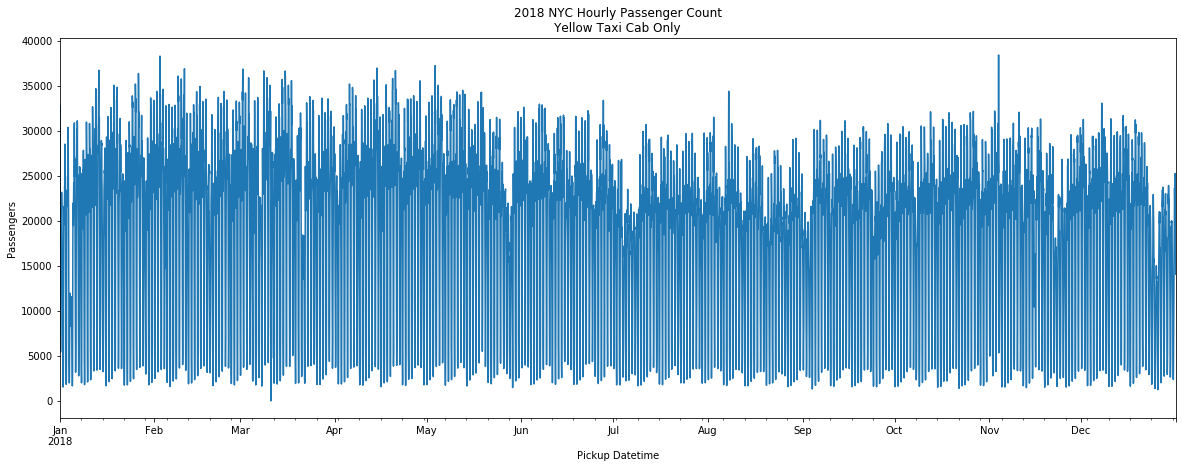

In [5]:
df.plot(figsize=(20,7), legend=None, title='2018 NYC Hourly Passenger Count\nYellow Taxi Cab Only')
plt.xlabel('Pickup Datetime')
plt.ylabel('Passengers')
plt.show()

# Compute Matrix Profiles

Here we compute Matrix Profiles over varying window sizes:

* 4 hours
* 8 hours
* 12 hours (Half of a day)
* 24 hours (A day)
* 168 hours (7 days)
* 720 hours (30 days)

In [6]:
windows = [
    ('4 Hours', 4),
    ('8 Hours', 8),
    ('12 Hours', 12),
    ('24 Hours', 24),
    ('7 Days', 7 * 24),
    ('30 Days', 30 * 24),
]

for label, window_size in windows:
    mp, mpi = stomp(df['passenger_count'].values, window_size)
    df['{} Profile'.format(label)] = np.append(mp, np.zeros(window_size - 1) + np.nan)

# Plot Matrix Profiles

Below is a plot showing the different Matrix Profiles over the window sizes described above. Notice that the window size chosen drastically changes the Matrix Profile that is computed. When analyzing your data, it is important to choose appropriate window sizes to answer your desired questions.

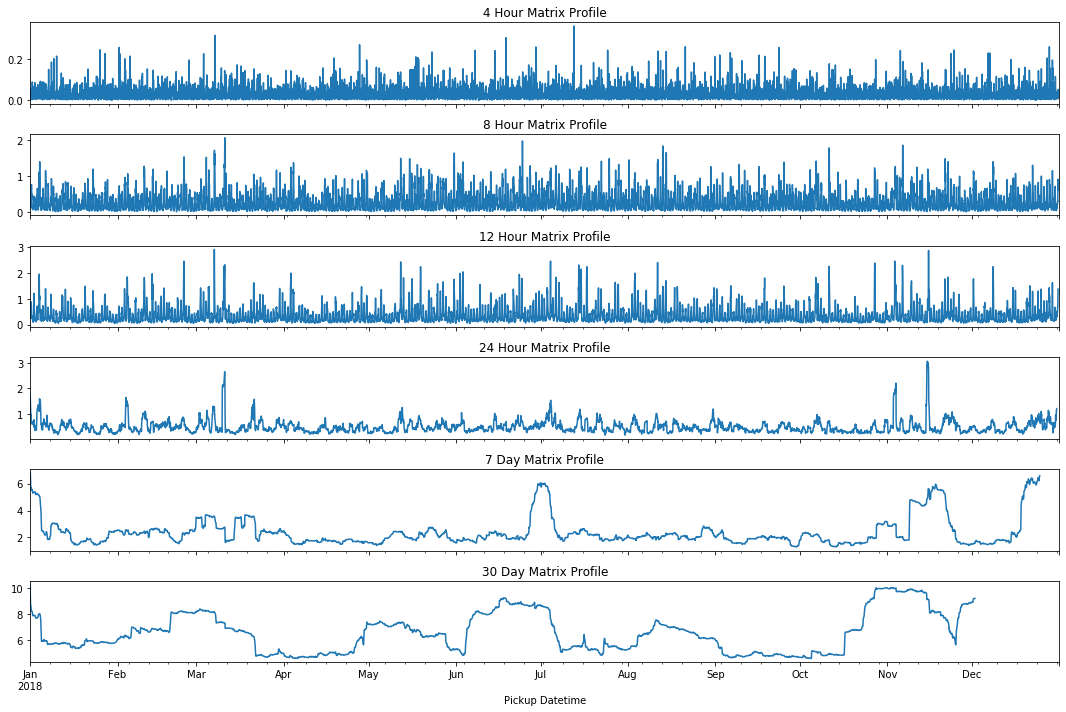

In [9]:
#Plot the signal data
fig, axes = plt.subplots(6,1,sharex=True,figsize=(15,10))

df['4 Hours Profile'].plot(ax=axes[0], title='4 Hour Matrix Profile')
df['8 Hours Profile'].plot(ax=axes[1], title='8 Hour Matrix Profile')
df['12 Hours Profile'].plot(ax=axes[2], title='12 Hour Matrix Profile')
df['24 Hours Profile'].plot(ax=axes[3], title='24 Hour Matrix Profile')
df['7 Days Profile'].plot(ax=axes[4], title='7 Day Matrix Profile')
df['30 Days Profile'].plot(ax=axes[5], title='30 Day Matrix Profile')
plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

In [12]:
df['4 Hours Profile'].nlargest(20)

pickup_datetime
2018-07-12 19:00:00    0.364148
2018-03-07 14:00:00    0.317821
2018-06-18 17:00:00    0.307314
2018-04-27 20:00:00    0.272109
2018-08-21 08:00:00    0.262181
2018-12-28 10:00:00    0.262181
2018-06-29 08:00:00    0.261003
2018-02-01 14:00:00    0.258844
2018-09-23 12:00:00    0.258653
2018-01-25 19:00:00    0.247501
2018-11-24 14:00:00    0.245965
2018-07-24 19:00:00    0.245489
2018-06-07 19:00:00    0.244247
2018-11-05 14:00:00    0.244039
2018-06-14 19:00:00    0.243488
2018-08-11 15:00:00    0.240860
2018-08-14 14:00:00    0.239398
2018-05-23 12:00:00    0.236519
2018-09-06 07:00:00    0.233425
2018-12-06 18:00:00    0.231786
Name: 4 Hours Profile, dtype: float64

In [13]:
df['8 Hours Profile'].nlargest(20)

pickup_datetime
2018-03-11 01:00:00    2.068718
2018-06-24 14:00:00    1.979247
2018-11-06 10:00:00    1.864570
2018-08-13 08:00:00    1.842070
2018-03-11 00:00:00    1.805966
2018-10-11 07:00:00    1.787718
2018-10-11 09:00:00    1.741489
2018-03-07 09:00:00    1.723982
2018-08-14 14:00:00    1.661477
2018-03-07 08:00:00    1.653139
2018-05-31 10:00:00    1.644723
2018-03-07 11:00:00    1.629737
2018-02-24 14:00:00    1.539703
2018-08-14 13:00:00    1.529875
2018-03-04 12:00:00    1.526981
2018-11-06 09:00:00    1.520101
2018-05-12 10:00:00    1.497640
2018-07-25 09:00:00    1.490909
2018-11-21 12:00:00    1.488862
2018-05-15 14:00:00    1.488479
Name: 8 Hours Profile, dtype: float64

In [14]:
df['12 Hours Profile'].nlargest(20)

pickup_datetime
2018-03-07 08:00:00    2.908384
2018-11-15 14:00:00    2.873603
2018-11-03 14:00:00    2.460884
2018-07-04 13:00:00    2.457698
2018-02-24 13:00:00    2.453358
2018-05-12 10:00:00    2.426385
2018-08-11 12:00:00    2.402980
2018-10-27 12:00:00    2.384742
2018-03-11 00:00:00    2.315479
2018-07-14 13:00:00    2.308887
2018-10-27 11:00:00    2.302499
2018-11-06 08:00:00    2.296539
2018-03-11 01:00:00    2.275534
2018-10-27 13:00:00    2.262287
2018-03-10 16:00:00    2.257829
2018-02-24 12:00:00    2.256088
2018-10-11 07:00:00    2.254822
2018-12-08 11:00:00    2.241954
2018-05-19 11:00:00    2.241954
2018-07-17 11:00:00    2.239100
Name: 12 Hours Profile, dtype: float64

In [22]:
df['24 Hours Profile'].nlargest(20)

pickup_datetime
2018-11-15 04:00:00    3.082695
2018-11-15 03:00:00    3.032110
2018-11-15 09:00:00    3.021287
2018-11-15 05:00:00    3.008351
2018-11-15 02:00:00    2.980521
2018-11-15 10:00:00    2.960667
2018-11-15 08:00:00    2.946016
2018-11-15 01:00:00    2.938139
2018-11-15 00:00:00    2.927165
2018-11-15 12:00:00    2.918417
2018-11-15 11:00:00    2.918406
2018-11-15 06:00:00    2.880819
2018-11-15 13:00:00    2.854810
2018-11-15 07:00:00    2.849882
2018-11-15 14:00:00    2.691954
2018-11-14 23:00:00    2.688315
2018-03-11 00:00:00    2.663374
2018-03-10 23:00:00    2.581655
2018-03-11 01:00:00    2.560544
2018-03-10 22:00:00    2.487742
Name: 24 Hours Profile, dtype: float64

In [26]:
df['7 Days Profile'].nlargest(20)

pickup_datetime
2018-01-01 02:00:00    6.796680
2018-01-01 01:00:00    6.645535
2018-12-25 00:00:00    6.586105
2018-12-24 23:00:00    6.569716
2018-12-24 22:00:00    6.537136
2018-01-01 03:00:00    6.496286
2018-12-24 15:00:00    6.455868
2018-12-24 21:00:00    6.436214
2018-12-24 14:00:00    6.430772
2018-12-24 09:00:00    6.427330
2018-12-24 10:00:00    6.420296
2018-12-22 03:00:00    6.417969
2018-12-22 02:00:00    6.417314
2018-12-22 04:00:00    6.415236
2018-12-24 13:00:00    6.412422
2018-12-24 11:00:00    6.410109
2018-12-22 01:00:00    6.408811
2018-12-22 05:00:00    6.407806
2018-12-24 12:00:00    6.407197
2018-12-22 06:00:00    6.402856
Name: 7 Days Profile, dtype: float64

In [24]:
df['30 Days Profile'].nlargest(20)

pickup_datetime
2018-01-01 00:00:00    10.271550
2018-11-02 20:00:00    10.051494
2018-11-02 21:00:00    10.050390
2018-11-02 22:00:00    10.045030
2018-11-02 23:00:00    10.043544
2018-11-03 00:00:00    10.042501
2018-11-02 05:00:00    10.038814
2018-11-02 19:00:00    10.038554
2018-11-02 06:00:00    10.034927
2018-10-31 15:00:00    10.034508
2018-11-03 01:00:00    10.030928
2018-10-31 14:00:00    10.030622
2018-10-31 16:00:00    10.029508
2018-11-02 18:00:00    10.027690
2018-10-31 17:00:00    10.026913
2018-11-02 04:00:00    10.026676
2018-11-02 16:00:00    10.026357
2018-11-02 14:00:00    10.026125
2018-10-31 18:00:00    10.026000
2018-11-02 17:00:00    10.025448
Name: 30 Days Profile, dtype: float64

# Find Discords

Here we find the top 5 anomalies for each window. An exclusion zone is required to avoid matching on time periods that are very close to one another.

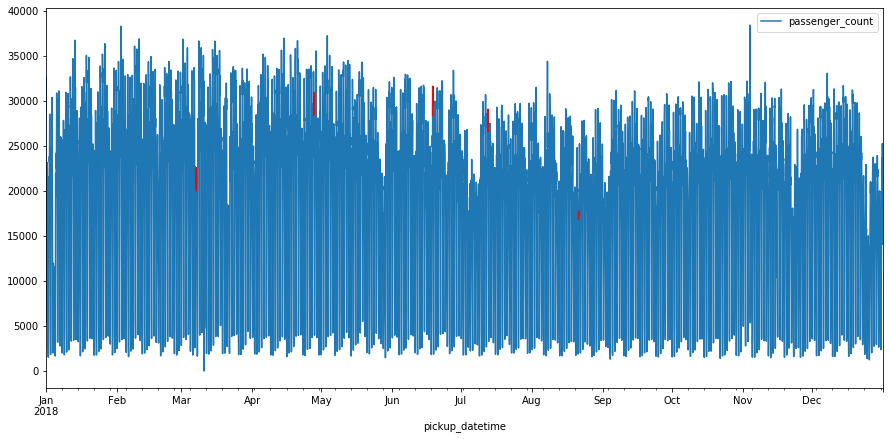

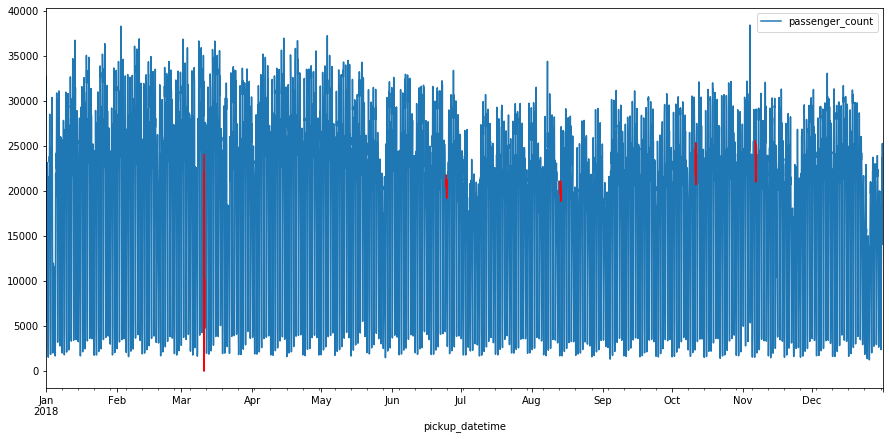

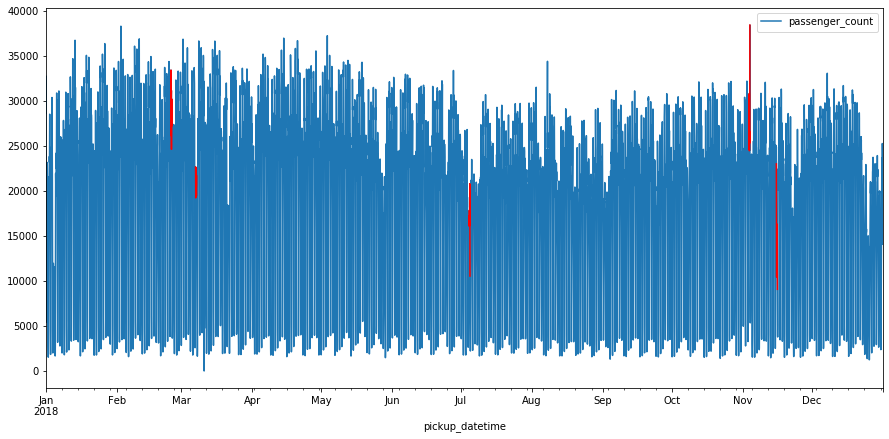

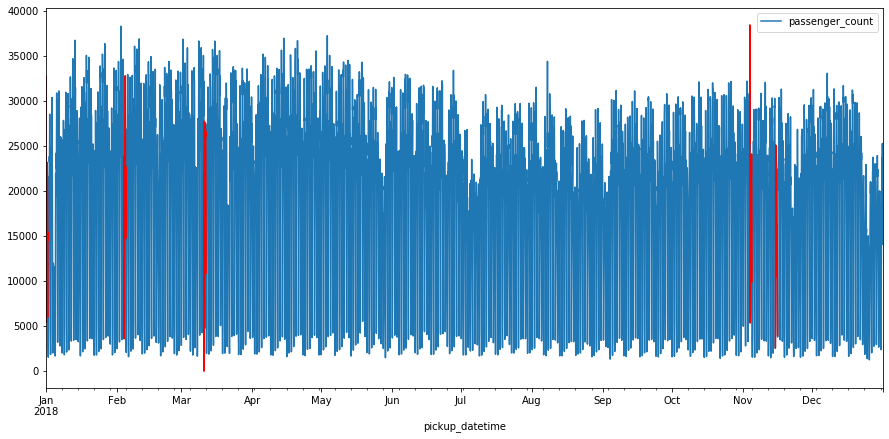

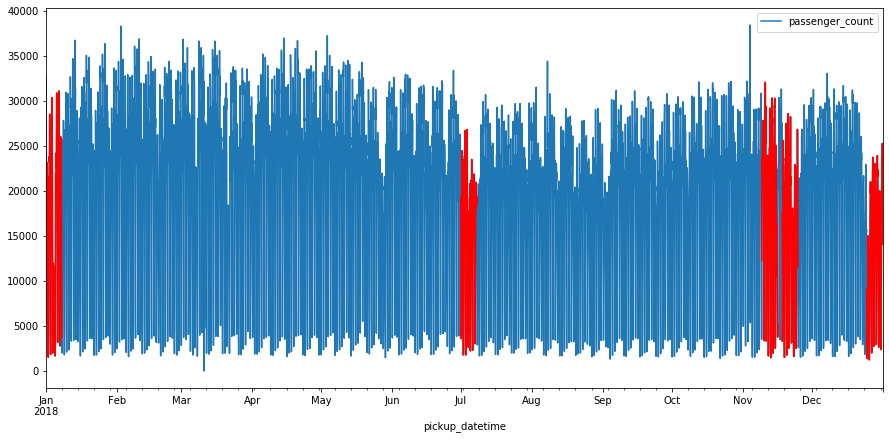

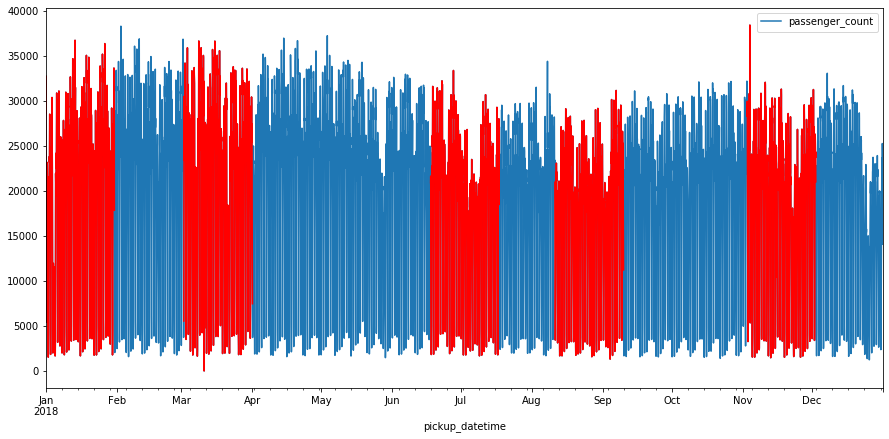

In [47]:
top_discords = {}

for label, window_size in windows:
    column_label = '{} Profile'.format(label)
    mp = df[column_label].values
    top_discords[label] = discords(mp, window_size, k=5)
    
    ax = df.plot(kind='line', y='passenger_count', figsize=(15, 7))
    for start_index in top_discords[label]:
        df.iloc[start_index:start_index+window_size]['passenger_count'].plot(kind='line', c='r')
    
    plt.show()

In [31]:
top_discords

{'4 Hours': array([4627, 1574, 4049, 2804, 5576]),
 '8 Hours': array([1657, 4190, 7426, 5384, 6799]),
 '12 Hours': array([1568, 7646, 7358, 4429, 1309]),
 '24 Hours': array([7636, 1656, 7368,    1,  816]),
 '7 Days': array([   2, 8592, 4344, 7706, 7494]),
 '30 Days': array([   0, 7340, 4028, 1445, 5328])}

In [48]:
top_motifs = {}

for label, window_size in windows:
    column_label = '{} Profile'.format(label)
    mp = df[column_label].values
    ts = df['passenger_count'].values
    top_motifs[label] = motifs(ts, mp, max_motifs=5)
    
#     ax = df.plot(kind='line', y='passenger_count', figsize=(15, 7))
#     for start_index in top_discords[label]:
#         df.iloc[start_index:start_index+window_size]['passenger_count'].plot(kind='line', c='r')
    
#     plt.show()

ValueError: argument mp must be a tuple